# IMPORTING LIBRARIES:

In [152]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# IMPORTING DATASET:

In [153]:
data = pd.read_csv("50_Startups.csv")

In [154]:
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [155]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


Venture Capitalist fund reuirement.
Analyze the 50 countries , build a model that tell the venture capitalist fund which types of companies it should invest in.
Their main criteria is profit.
A model is required that tells about profit based on R&D Spend, Marketing Spend, Administration and State.
The venture wants to understand for instance 
(1) where companies perform better; in New York or California
while all other parameters are held equal or which companies perform better if you hold others columns equal.
(2) Will a company that spends more on marketing perform better or a company spends less on marketing.
(3) they want to understand when they assist companies, do they look for companies to spend more on R&D spend or on research and development or companies to
spend more on marketing , which of these two spends yields better results of profit brings more results of profit.

# EDA:

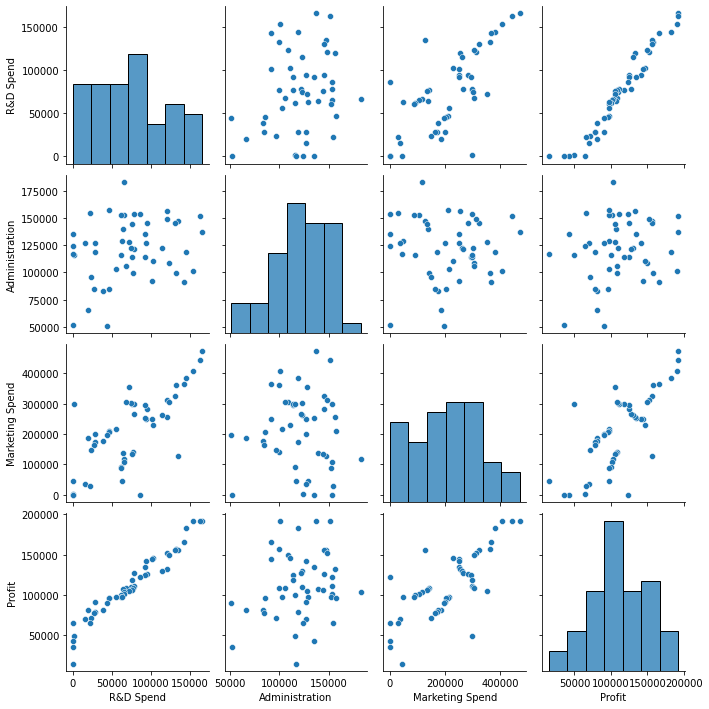

In [50]:
sns.pairplot(data)

<AxesSubplot:>

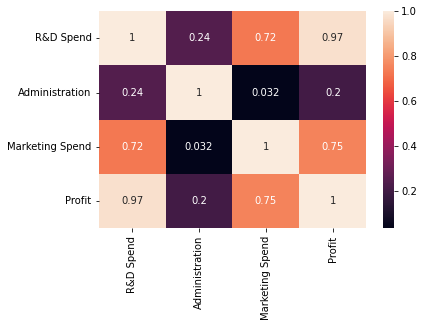

In [117]:
sns.heatmap(abs(data.corr()),annot=True)

# DATA PRE-PROCESSING:

### ENCODING CATEGORICAL-nonNUMERIC PREDICTORS:

(1) The predictor, "State" need to be encoded as it is non-numeric
As the predictor is categorical(from an eye-inspection); one-hot-encoding will be used

In [156]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [157]:
X = data.iloc[:,:-1].values

In [158]:
y = data.iloc[:,-1].values

In [159]:
ct = ColumnTransformer(transformers=[("encoder" ,OneHotEncoder(),[3])] , remainder="passthrough" )

In [160]:
X = np.array(ct.fit_transform(X))

In [161]:
type(X)

numpy.ndarray

In [162]:
pd.DataFrame(X).head()

,0,1,2,3,4,5
0,0.0,0.0,1.0,165349.2,136897.8,471784.1
1,1.0,0.0,0.0,162597.7,151377.59,443898.53
2,0.0,1.0,0.0,153441.51,101145.55,407934.54
3,0.0,0.0,1.0,144372.41,118671.85,383199.62
4,0.0,1.0,0.0,142107.34,91391.77,366168.42


### SPLITTING DATASET INTO TRAIN TEST SETS:

In [163]:
from sklearn.model_selection import train_test_split

In [164]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.8,random_state=101)

# TRAINING THE MULTIPLE LINEAR REGRESSION MODEL ON TRAINING SET:

In [165]:
from sklearn.linear_model import LinearRegression

In [166]:
regressor = LinearRegression()

In [167]:
regressor.fit(X_train,y_train)

LinearRegression()

# PREDICTING THE TEST SET RESULTS:

In [168]:
predictions = regressor.predict(X_test)

In [169]:
pd.DataFrame(data = np.transpose(np.concatenate(([y_test],[predictions]),axis=0)) , columns = ["y_test","regressor_Predictions"] )

,y_test,regressor_Predictions
0,89949.14,86894.761547
1,132602.65,153481.032713
2,111313.02,119836.841145
3,97427.84,98459.900830
4,110352.25,118555.739794
5,191792.06,189726.001558
6,105733.54,114295.314858
7,49490.75,61551.299422
8,71498.49,70236.863774
9,42559.73,47600.767432


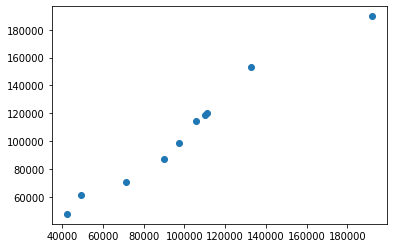

In [170]:
plt.scatter(y_test,predictions)

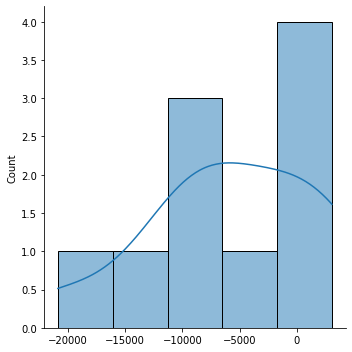

In [171]:
sns.displot((y_test-predictions),kde=True)

# ERROR ANALYSIS: 

In [172]:
from sklearn import metrics

In [173]:
metrics.mean_absolute_error(y_test,predictions)

7068.317931582249

In [174]:
metrics.mean_squared_error(y_test,predictions)

83628721.142752

In [175]:
np.sqrt(metrics.mean_squared_error(y_test,predictions))

9144.874036461739

In [176]:
metrics.explained_variance_score(y_test,predictions)

0.969695687056966

# REVIEW:

Question 1: How do I use my multiple linear regression model to make a single prediction, for example, the profit of a startup with R&D Spend = 160000, Administration Spend = 130000, Marketing Spend = 300000 and State = California?

In [177]:
regressor.predict([[1,0,0,160000,130000,300000]])[0]

182377.68153835315

Question 2: How do I get the final regression equation y = b0 + b1 x1 + b2 x2 + ... with the final values of the coefficients?

In [178]:
coeff = pd.DataFrame(data=regressor.coef_ , columns = ["Coefficients"])

In [179]:
coeff

,Coefficients
0,-1279.919746
1,1971.926579
2,-692.006833
3,0.779452
4,0.020681
5,0.033923


In [180]:
cfs = regressor.coef_

In [181]:
intercept = regressor.intercept_

In [182]:
print("Equation of line is:")

Equation of line is:


In [183]:
print("Profit = ",intercept, "+ California * ",cfs[0]," + Florida * ",cfs[1]," + NewYork * ",cfs[2]," + R&DSpend * ",cfs[3]," + AdministrationSpend * ",cfs[4]," + MarketingSpend * ",cfs[5])

Profit =  46079.903454205865 + California *  -1279.919745788059  + Florida *  1971.9265786681271  + NewYork *  -692.0068328753904  + R&DSpend *  0.7794521518655984  + AdministrationSpend *  0.02068114466277393  + MarketingSpend *  0.03392268241759666
